In [18]:
import matplotlib.pyplot as plt 
import numpy as np

In [19]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES= [0.2, 0.5, 0.75]

In [20]:
class Bandit:
    def __init__(self, p):

        self.p = p
        self.p_estimate = 10
        self.N = 1

    def pull(self):
        return np.random.random() < self.p
    
    def update(self, x):
        self.N+=1
        self.p_estimate = ((self.N-1)*self.p_estimate + x ) / self.N

In [23]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)

    for i in range(NUM_TRIALS):

        j = np.argmax([b.p_estimate for b in bandits])

        x = bandits[j].pull()

        rewards[i] = x

        bandits[j].update(x)


    for b in bandits:
        print("mean estimate:", b.p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:" , rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    cumulative_rewards  = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim(0,1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()




mean estimate: 0.7058823529411765
mean estimate: 0.6944444444444444
mean estimate: 0.7505852926463188
total reward earned: 75028.0
overall win rate: 0.75028
num times selected each bandit: [17, 36, 99950]


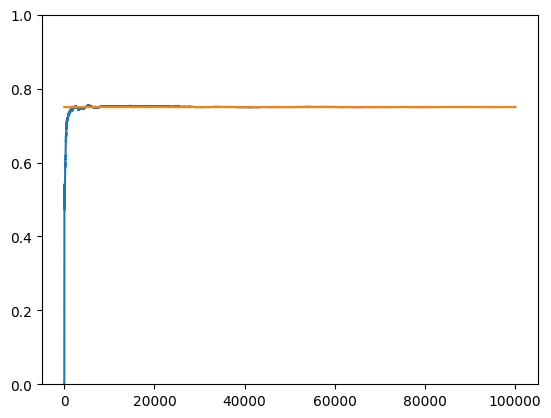

In [24]:
experiment()